In [1]:
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
# creates an WCS object by specifying a dictionary
wcs_input_dict = {
    'CTYPE1': 'RA---TAN', 
    'CUNIT1': 'deg', 
    'CDELT1': -0.0002777777778, 
    'CRPIX1': 1, 
    'CRVAL1': 337.5202808, 
    'NAXIS1': 1024,
    'CTYPE2': 'DEC--TAN', 
    'CUNIT2': 'deg', 
    'CDELT2': 0.0002777777778, 
    'CRPIX2': 1, 
    'CRVAL2': -20.833333059999998, 
    'NAXIS2': 1024
}
wcs_helix_dict = WCS(wcs_input_dict)

In [3]:
# To check output
wcs_helix_dict

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 337.5202808 -20.833333059999998 
CRPIX : 1.0 1.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.0002777777778 0.0002777777778 
NAXIS : 1024  1024

In [4]:
# empty WCS object
wcs_helix_list = WCS(naxis=2)
wcs_helix_list.wcs.crpix = [1, 1]
wcs_helix_list.wcs.crval = [337.5202808, -20.833333059999998]
wcs_helix_list.wcs.cunit = ["deg", "deg"]
wcs_helix_list.wcs.ctype = ["RA---TAN", "DEC--TAN"]
wcs_helix_list.wcs.cdelt = [-0.0002777777778, 0.0002777777778]

In [6]:
 # To check output
wcs_helix_list

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 337.5202808 -20.833333059999998 
CRPIX : 1.0 1.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.0002777777778 0.0002777777778 
NAXIS : 0  0

In [7]:
# changes shape of array
wcs_helix_list.array_shape = [1024, 1024]

In [8]:
# shows updated array
wcs_helix_list

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 337.5202808 -20.833333059999998 
CRPIX : 1.0 1.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.0002777777778 0.0002777777778 
NAXIS : 1024  1024

In [11]:
# reads in a FITS file
header_data_unit_list = fits.open('https://github.com/astropy/astropy-data/raw/6d92878d18e970ce6497b70a9253f65c925978bf/tutorials/celestial-coords1/tailored_dss.22.29.38.50-20.50.13_60arcmin.fits')

In [12]:
# prints number of extensions and summary of contents of extension of FITS file
header_data_unit_list.info()

Filename: C:\Users\julia\.astropy\cache\download\url\21d072715b8ee90ab2fe1405b0e5fb1a\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     121   (2119, 2119)   int16   


In [14]:
# reads in data and header of FITS file
image = header_data_unit_list[0].data
header = header_data_unit_list[0].header

In [15]:
# prints header to check information
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2119                                                  
NAXIS2  =                 2119                                                  
DATE    = '03/09/19          ' /Date of FITS file creation                      
ORIGIN  = 'CASB -- STScI     ' /Origin of FITS image                            
PLTLABEL= 'J 10265           ' /Observatory plate label                         
PLATEID = '04I5              ' /GSSS Plate ID                                   
REGION  = 'S602              ' /GSSS Region Name                                
DATE-OBS= '1985-06-15'         / UT date of Observation                         
UT      = '18:30:00.00       ' /UT time of observation                          
EPOCH   =  1.9854542236328E+

In [16]:
# can create WCS object directly from header
wcs_helix = WCS(header)

In [17]:
# prints object information
wcs_helix

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 336.6811440416667 -19.745016572222223 
CRPIX : 2499.6447489941065 3378.9002584168584 
PC1_1 PC1_2  : 0.025282857855146917 4.4684674035885186e-05 
PC2_1 PC2_2  : -4.8420685266167345e-05 0.0252859566668733 
CDELT : -0.01867333422948538 0.01867333422948538 
NAXIS : 2119  2119

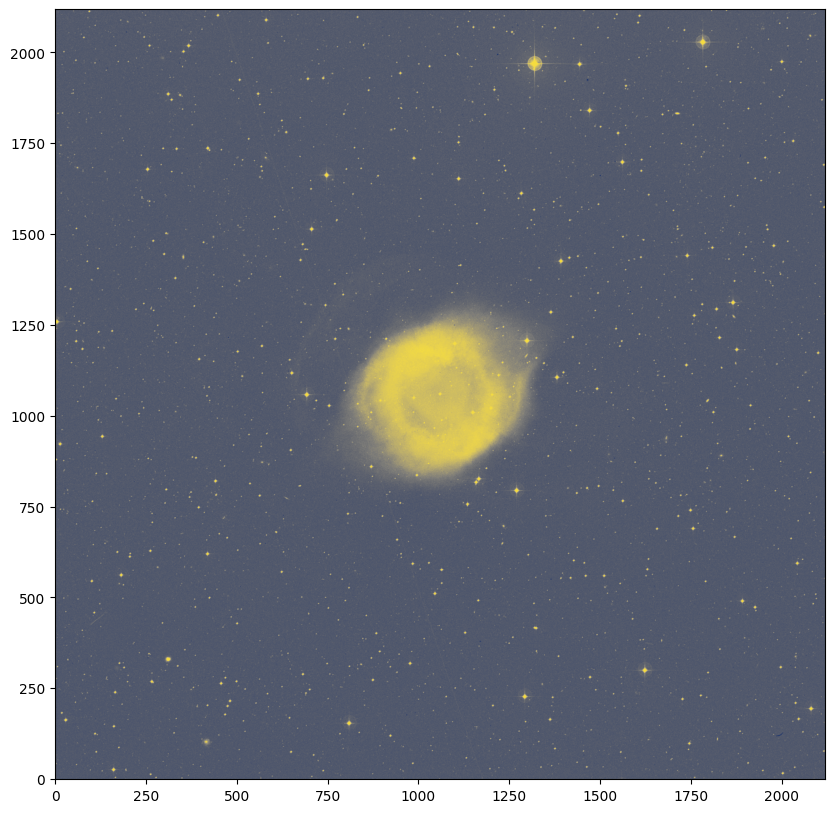

In [18]:
# plots image data
fig = plt.figure(figsize=(10, 10))
plt.imshow(image, origin='lower', cmap='cividis')

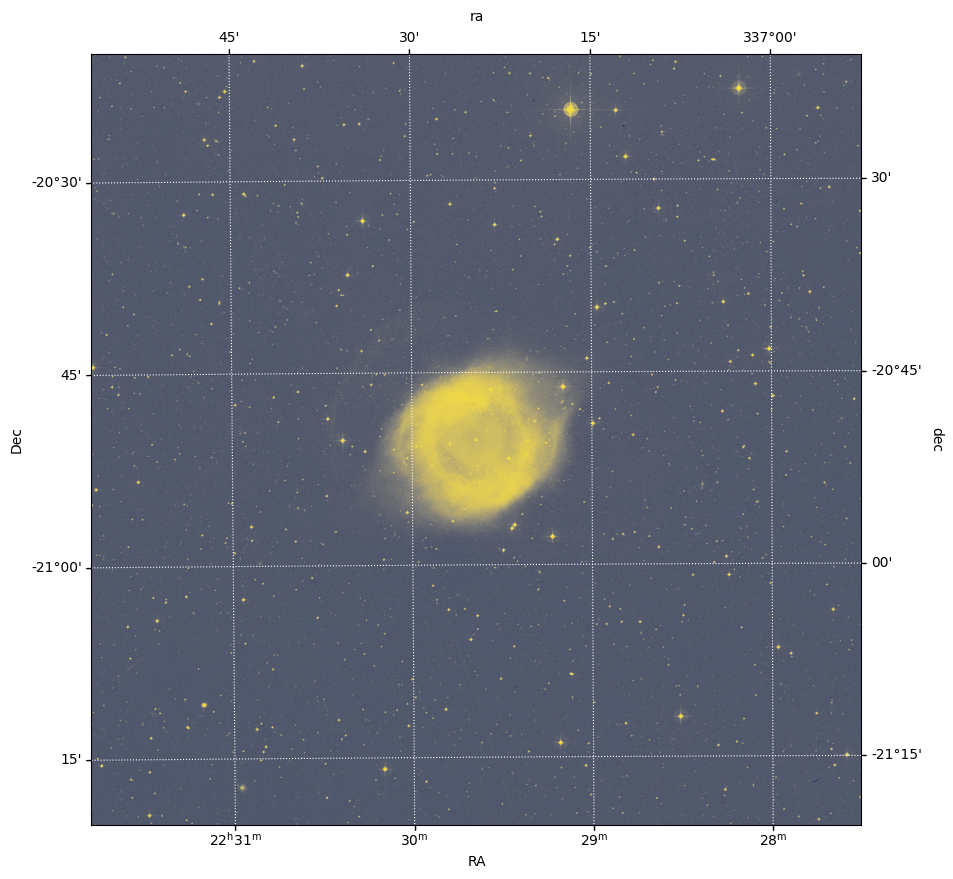

In [19]:
# produces sky image above but with sky coordinates for the axis
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)
plt.imshow(image, origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')

overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')

In [ ]:
'''

Exercise 1: Copy the code block above and instead overlay a coordinate grid in Galactic coordinates.

'''

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)
plt.imshow(image, origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')

overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='white', ls='dotted')